In [50]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [22]:
response=requests.get("https://www.sofascore.com/football/match/arsenal-nottingham-forest/osR#id:14025124,tab:statistics")

In [23]:
response.status_code

200

In [24]:
soup=BeautifulSoup(response.text,"html.parser")

In [25]:
soup.select('g[cursor="pointer"]')

[]

In [26]:
response.status_code

200

In [27]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.sofascore.com/football/match/arsenal-nottingham-forest/osR',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
}

url = "https://www.sofascore.com/api/v1/event/14025124/shotmap"

response = requests.get(url, headers=headers)

print(response.status_code) 

200


In [28]:
shots=response.json()

In [29]:
df=pd.json_normalize(shots["shotmap"])

In [30]:
df.head()

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,addedTime,...,draw.block.x,draw.block.y,draw.end.x,draw.end.y,draw.goal.x,draw.goal.y,player.firstName,player.lastName,goalType,player.sofascoreId
0,False,block,fast-break,right-foot,low-centre,0.131568,0.000000,5630413,90,5.0,...,59.6,8.8,49.7,0,49.7,81.0,NaN,NaN,NaN,NaN
1,False,block,assisted,right-foot,low-left,0.012879,0.000000,5630404,90,3.0,...,31.6,18.0,46.8,0,46.8,81.0,,,NaN,NaN
2,True,goal,set-piece,head,high-right,0.112118,0.741471,5630204,79,NaN,...,NaN,NaN,53.0,0,53.0,74.1,NaN,NaN,regular,martin_zubimendi
3,False,block,regular,right-foot,low-centre,0.014793,0.000000,5630035,67,NaN,...,68.2,16.6,49.3,0,49.3,81.0,NaN,NaN,NaN,NaN
4,True,post,assisted,right-foot,right,0.057018,0.000000,5629989,59,NaN,...,NaN,NaN,55.1,0,55.1,65.8,NaN,NaN,NaN,VGyökeres


In [31]:
df.columns

Index(['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
       'xg', 'xgot', 'id', 'time', 'addedTime', 'timeSeconds',
       'reversedPeriodTime', 'reversedPeriodTimeSeconds', 'periodTimeSeconds',
       'incidentType', 'player.name', 'player.slug', 'player.shortName',
       'player.position', 'player.jerseyNumber', 'player.userCount',
       'player.id', 'player.fieldTranslations.nameTranslation.ar',
       'player.fieldTranslations.nameTranslation.hi',
       'player.fieldTranslations.nameTranslation.bn',
       'player.fieldTranslations.shortNameTranslation.ar',
       'player.fieldTranslations.shortNameTranslation.hi',
       'player.fieldTranslations.shortNameTranslation.bn',
       'playerCoordinates.x', 'playerCoordinates.y', 'playerCoordinates.z',
       'goalMouthCoordinates.x', 'goalMouthCoordinates.y',
       'goalMouthCoordinates.z', 'blockCoordinates.x', 'blockCoordinates.y',
       'blockCoordinates.z', 'draw.start.x', 'draw.start.y', 'draw.block.x',


In [32]:
df=df[["isHome","shotType","xg","xgot","time","player.shortName","playerCoordinates.x","playerCoordinates.y","goalMouthCoordinates.x","goalMouthCoordinates.y"]]

In [33]:
df

,isHome,shotType,xg,xgot,time,player.shortName,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,False,block,0.131568,0.000000,90,A. Kalimuendo,12.8,64.1,0,50.3
1,False,block,0.012879,0.000000,90,N. Williams,22.0,28.2,0,53.2
2,True,goal,0.112118,0.741471,79,M. Zubimendi,7.1,53.8,0,47.0
3,False,block,0.014793,0.000000,67,A. Kalimuendo,18.8,70.8,0,50.7
4,True,post,0.057018,0.000000,59,V. Gyökeres,7.0,66.6,0,44.9
5,True,miss,0.074200,0.000000,57,E. Nwaneri,13.4,51.6,0,50.6
6,True,miss,0.032980,0.000000,52,E. Nwaneri,13.4,70.9,0,61.0
7,False,save,0.018379,0.051007,52,C. Wood,13.7,62.4,0,47.8
8,True,goal,0.458723,0.226677,46,V. Gyökeres,6.3,50.0,0,49.9
9,True,block,0.107020,0.000000,45,V. Gyökeres,4.5,41.3,0,53.0


In [34]:
df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
df["goalMouthCoordinates.x"]=df["goalMouthCoordinates.x"]*1.2
df["goalMouthCoordinates.y"]=df["goalMouthCoordinates.y"]*0.8

In [35]:
df

,isHome,shotType,xg,xgot,time,player.shortName,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,False,block,0.131568,0.000000,90,A. Kalimuendo,15.36,51.28,0.0,40.24
1,False,block,0.012879,0.000000,90,N. Williams,26.40,22.56,0.0,42.56
2,True,goal,0.112118,0.741471,79,M. Zubimendi,8.52,43.04,0.0,37.60
3,False,block,0.014793,0.000000,67,A. Kalimuendo,22.56,56.64,0.0,40.56
4,True,post,0.057018,0.000000,59,V. Gyökeres,8.40,53.28,0.0,35.92
5,True,miss,0.074200,0.000000,57,E. Nwaneri,16.08,41.28,0.0,40.48
6,True,miss,0.032980,0.000000,52,E. Nwaneri,16.08,56.72,0.0,48.80
7,False,save,0.018379,0.051007,52,C. Wood,16.44,49.92,0.0,38.24
8,True,goal,0.458723,0.226677,46,V. Gyökeres,7.56,40.00,0.0,39.92
9,True,block,0.107020,0.000000,45,V. Gyökeres,5.40,33.04,0.0,42.40


In [41]:
endnote="@Kandula Raghunandan / Data From: Sofa Score"

Text(0.5, -0.05, 'Data Source: Sofascore | Viz: @Kandula Raghunandan')

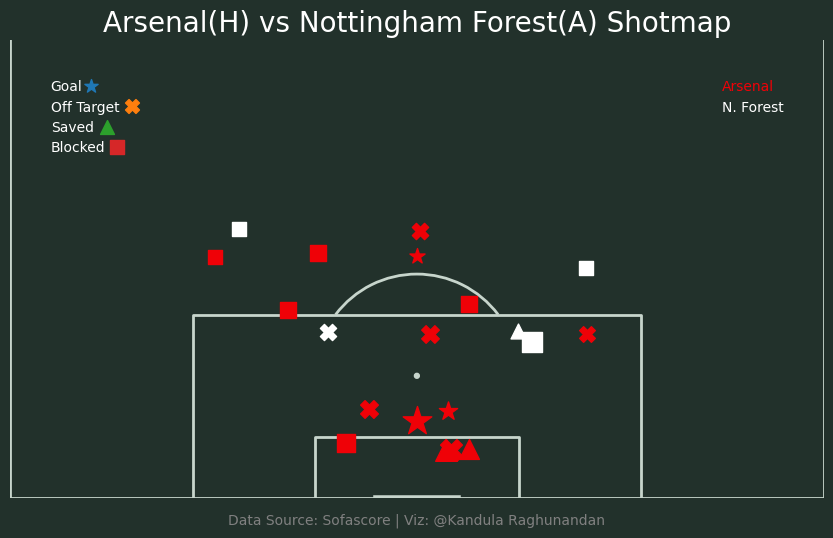

In [46]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

ax.set_xlim(0,80)
ax.set_ylim(0,45)

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#EF0107",s=df["xg"][x]*800+100,marker="^")
        if df["shotType"][x]=="miss":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#EF0107",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#EF0107",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#EF0107",s=df["xg"][x]*800+100,marker="*")
    if (df["isHome"][x]==False):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="^")
        if df["shotType"][x]=="miss":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="*")

plt.title("Arsenal(H) vs Nottingham Forest(A) Shotmap",color="white",size="20")
ax.text(4,40,"Goal",c="white")
ax.scatter(8,40.5,marker="*",s=100)
ax.text(4,38,"Off Target",color="white")
ax.scatter(12,38.5,marker="X",s=100)
ax.text(4,36,"Saved",color="white")
ax.scatter(9.5,36.5,marker="^",s=100)
ax.text(4,34,"Blocked",color="white")
ax.scatter(10.5,34.5,marker="s",s=100)

ax.text(70,40,"Arsenal",c="#EF0107")
ax.text(70,38,"N. Forest",c="#FFFFFF")


plt.text(
    0.5, -0.05, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)